In [29]:
import requests as r
import datetime as dt
import csv

url = 'https://api.covid19api.com/dayone/country/brazil'

response = r.get(url)

if response.status_code != 200:
	print('Nao foi possivel acessar a origem dos dados')

raw_data = response.json()

final_data = []
# header
final_data.insert(0, ['confirmados', 'obitos', 'recuperados', 'ativos', 'data'])
for obs in raw_data:
	final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

# constantes para auxiliar a acessar posicoes da lista
CONFIRMADOS = 0
OBITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

for i in range(1, len(final_data)):
	final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA][:10], '%Y-%m-%d')

with open('brasil_covid.csv', 'w') as file:
	writer = csv.writer(file)
	writer.writerows(final_data)

In [56]:
def get_datasets(y, labels):
	if (type(y[0]) == list):
		datasets = []
		for i in range(len(y)):
			datasets.append({
				'label': labels[i],
				'data': y[i]
			})
		
		return datasets
	else:
		return [
			{
				'label': labels[0],
				'data': y
			}
		]

In [52]:
def set_title(title=''):
	if (title != ''):
		display = 'true'
	else:
		display = 'false'
	
	return {
		'title':  {
			'display': display,
			'text': title
		}
	}

In [39]:
def create_chart(x, y, labels,  kind='bar', title=''):
	datasets = get_datasets(y, labels)
	options = set_title(title)

	chart = {
		'type': kind,
		'data': {
			'labels': x,
			'datasets': datasets
		},
		'options': options
	}

	return chart

In [33]:
def get_api_chart(chart):
	url_base = 'https://quickchart.io/chart'

	resp = r.get(f'{url_base}?c={str(chart )}')

	return resp.content

In [34]:
def save_image(path, content):
	with open(path, 'wb') as image:
		image.write(content)

In [9]:
from PIL import Image
from IPython.display import display

def display_image(path):
	img_pil = Image.open(path)
	display(img_pil)

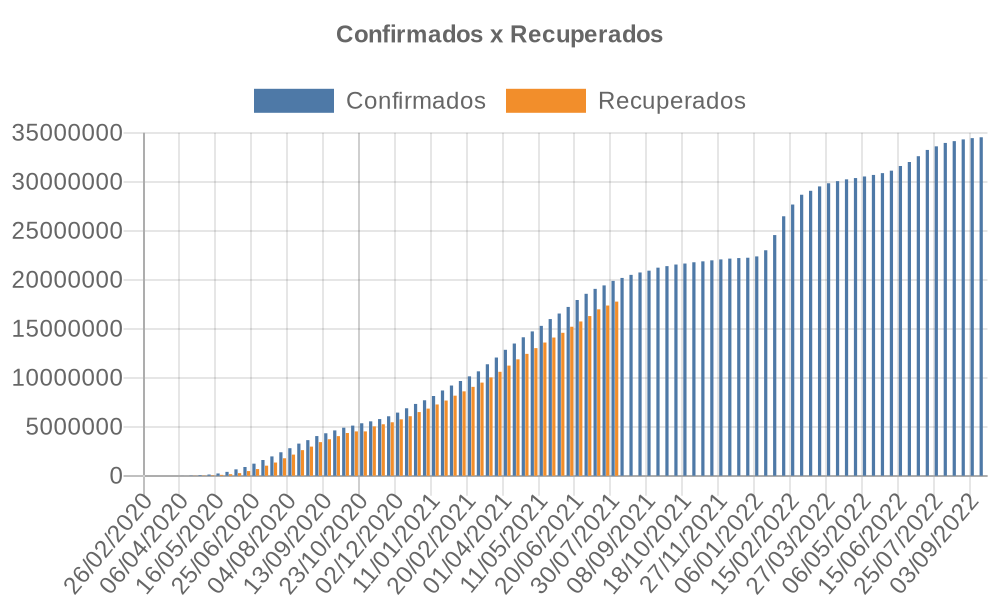

In [58]:
y_data_1 = []
for obs in final_data[1::10]:
	y_data_1.append(obs[CONFIRMADOS])

y_data_2 = []
for obs in final_data[1::10]:
	y_data_2.append(obs[RECUPERADOS])

labels = ['Confirmados', 'Recuperados']

x = []
for obs in final_data[1::10]:
	x.append(obs[DATA].strftime('%d/%m/%Y'))

chart = create_chart(x, [y_data_1, y_data_2], labels, title='Confirmados x Recuperados')
chart_content = get_api_chart(chart)
save_image('confirmados-vs-recuperados.png', chart_content)
display_image('confirmados-vs-recuperados.png')

In [59]:
from urllib.parse import quote

def get_api_qrcode(link):
	# parsing do link para url
	texto = quote(link)

	url_base_qr = 'https://quickchart.io/qr'
	resp = r.get(f'{url_base_qr}?text={texto}')
	
	return resp.content

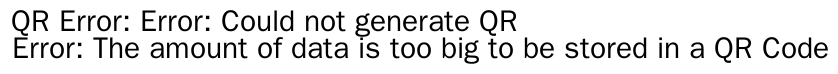

In [60]:
url_base = 'https://quickchart.io/chart'

link = f'{url_base}?c={str(chart )}'
save_image('qrcode.png', get_api_qrcode(link))
display_image('qrcode.png')